In [1]:
import os
import pickle
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.inspection import permutation_importance

warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
DATADIR = os.path.join(os.getcwd(), 'data', 'GBRT')

features = ['priorProb', 'entityPrior', 'maxPriorProb', 'numCands',
            'editDist', 'mentionIsCand', 'mentionInCand', 'isStartorEnd',
            'contextSim', 'coherence', 'rank']

In [3]:
def load_model(fname):
    model = None
    with open(os.path.join(DATADIR, fname), 'rb') as f:
        model = pickle.load(f)
    return model


def plot_feat_importance(model, X, num_samples=2000):
    n = model.n_features_
    X = X.sample(num_samples)
    X_test, y_test = X[features[:n]], X['y']

    fig, ax = plt.subplots(figsize=(6, 4))
    feat_importances = pd.Series(model.feature_importances_, index=features[:n])
    feat_importances.plot.bar(ax=ax)
    ax.set_title("Feature importance")
    ax.set_ylabel("Feature")
    ax.set_xticklabels(features[:n], rotation=45, ha='right', rotation_mode='anchor')
    fig.tight_layout()
    plt.show()

    fig, ax = plt.subplots(figsize=(6, 4))
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
    perm_importances = pd.Series(result.importances_mean, index=features[:n])
    perm_importances.plot.bar(yerr=result.importances_std, ax=ax)
    ax.set_title("Feature importances using permutation")
    ax.set_ylabel("Mean accuracy decrease")
    ax.set_xticklabels(features[:n], rotation=45, ha='right', rotation_mode='anchor')
    fig.tight_layout()
    plt.show()

    explainer = shap.TreeExplainer(model=model, data=None, model_output='raw',
                                   feature_perturbation='tree_path_dependent')
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, features=X_test)

coherence.pkl


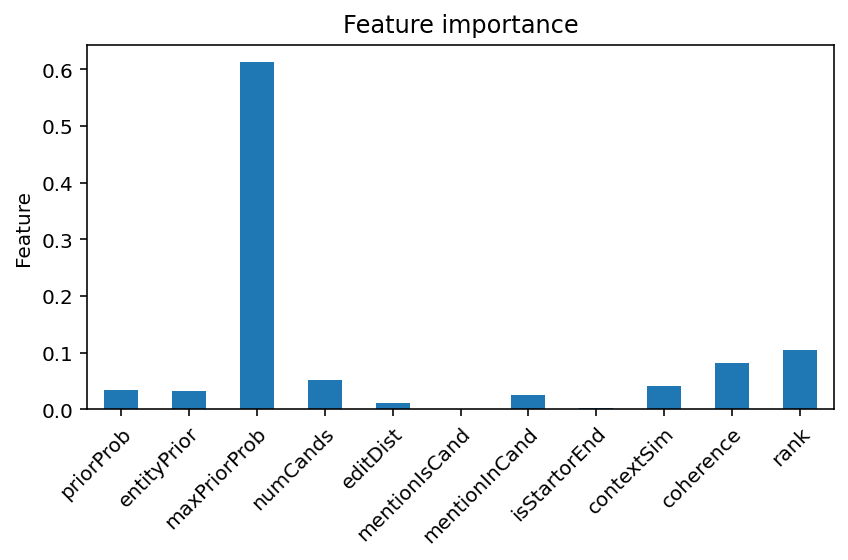

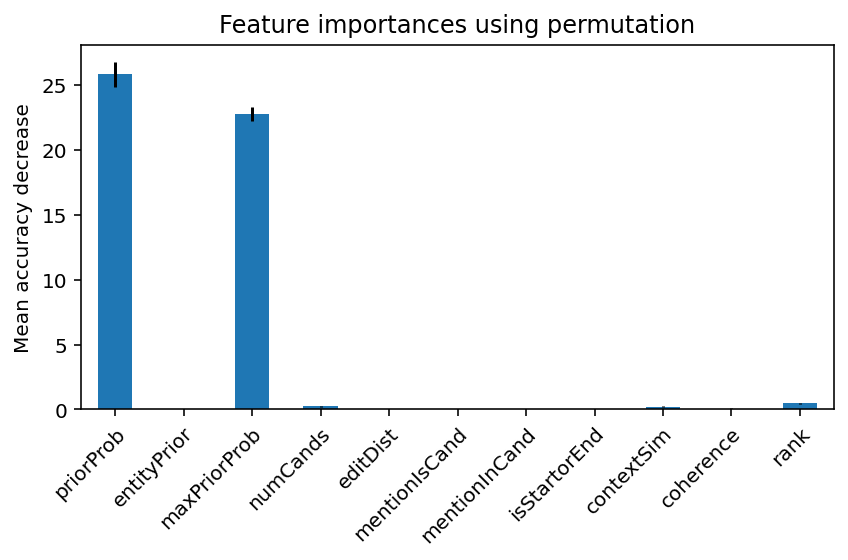

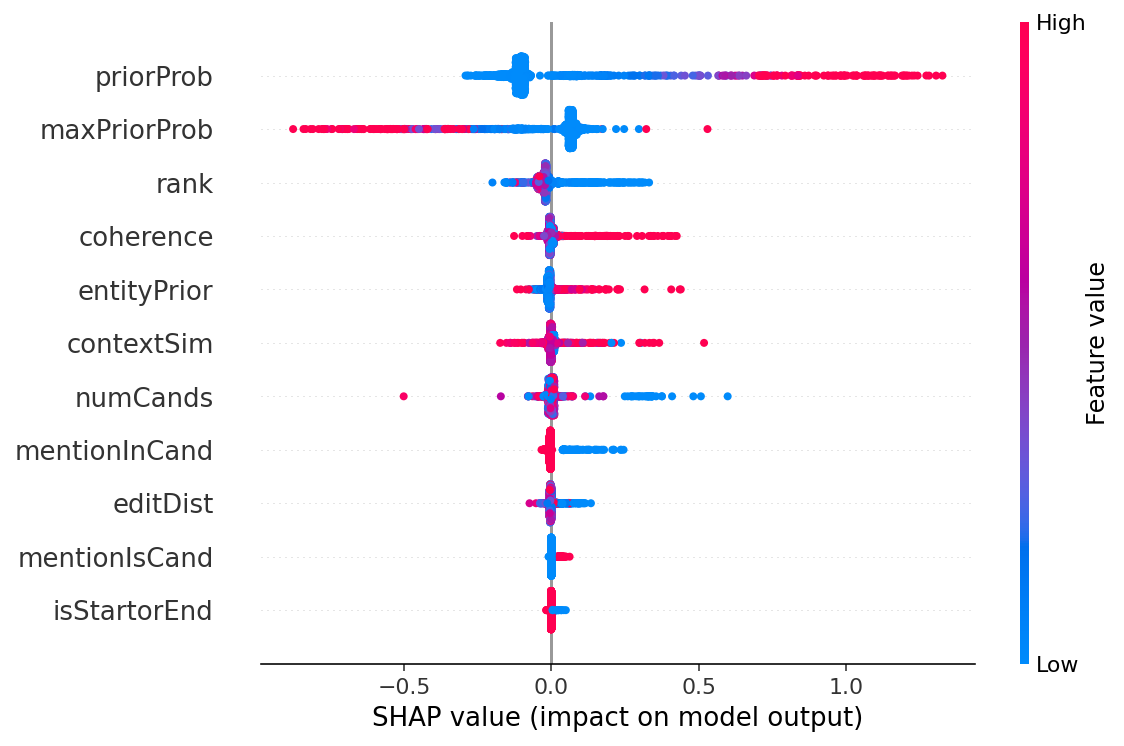

context.pkl


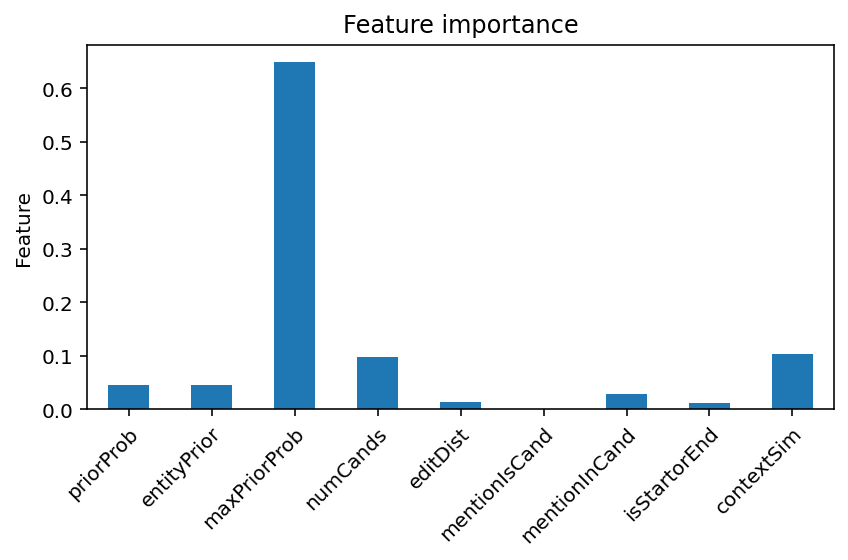

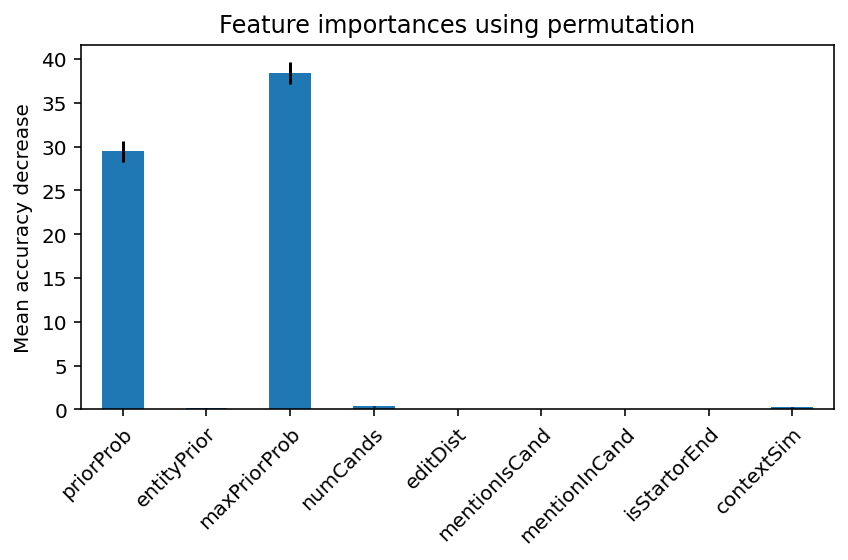

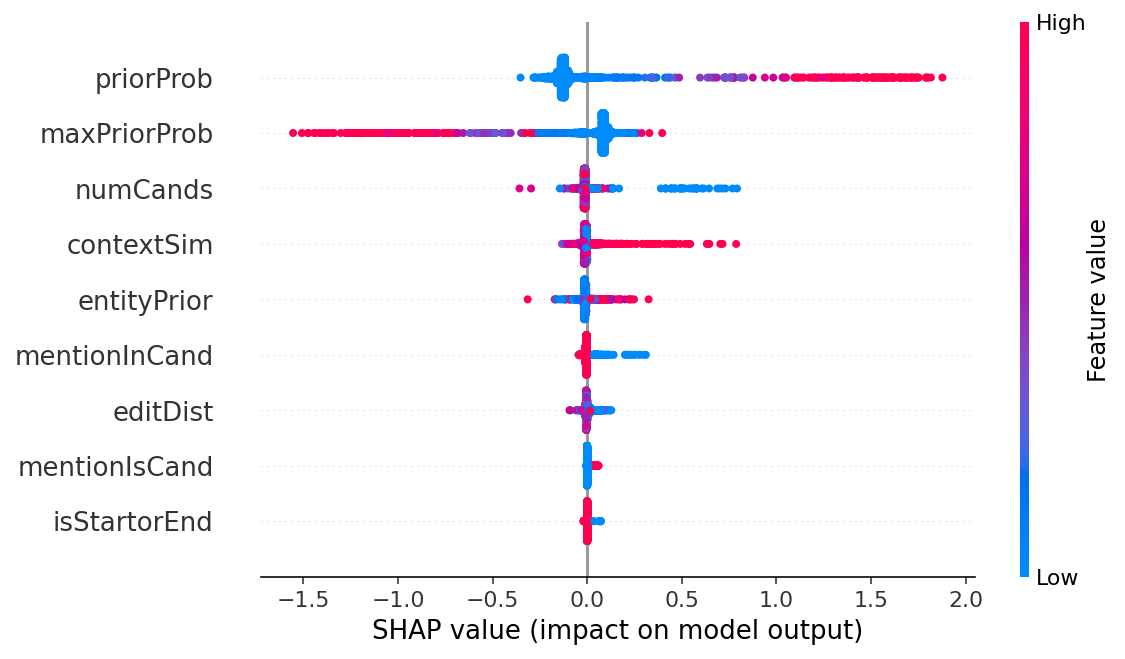

string_sim.pkl


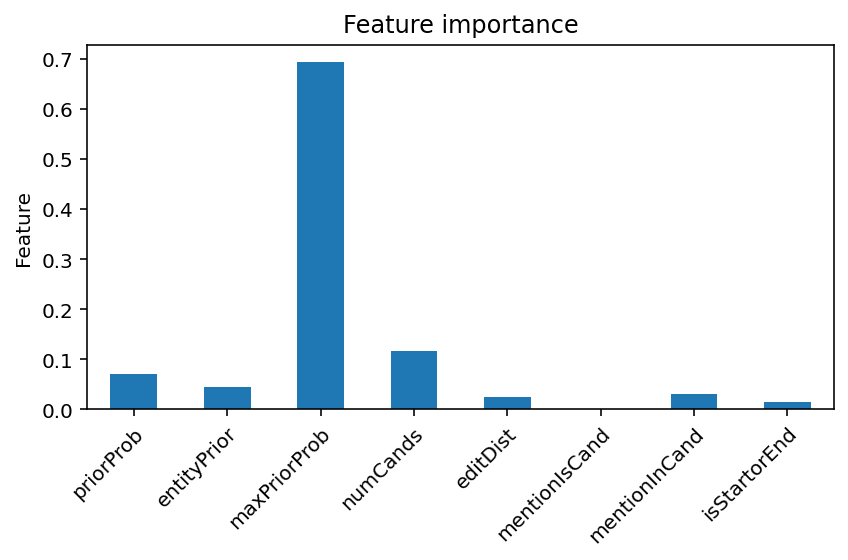

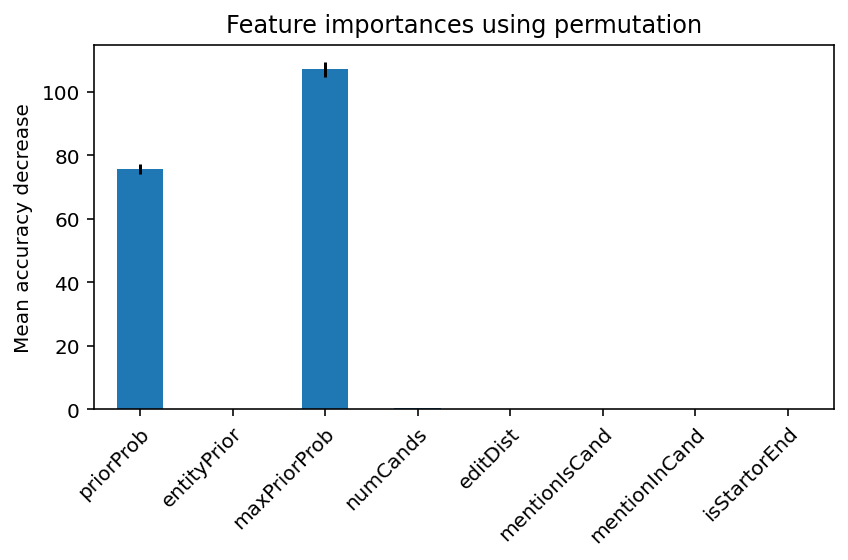

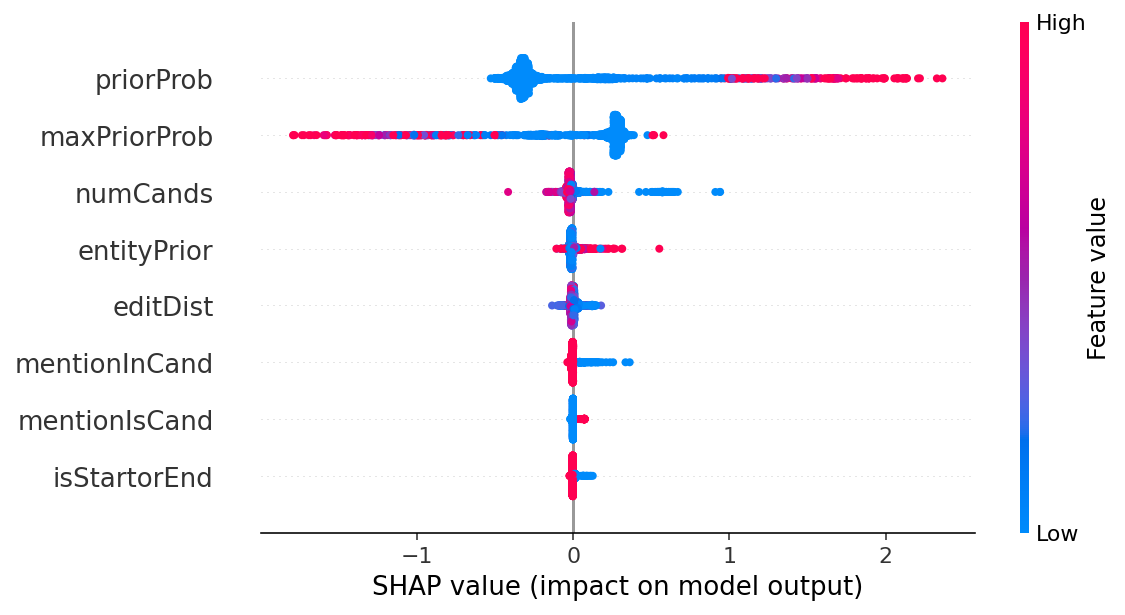

base.pkl


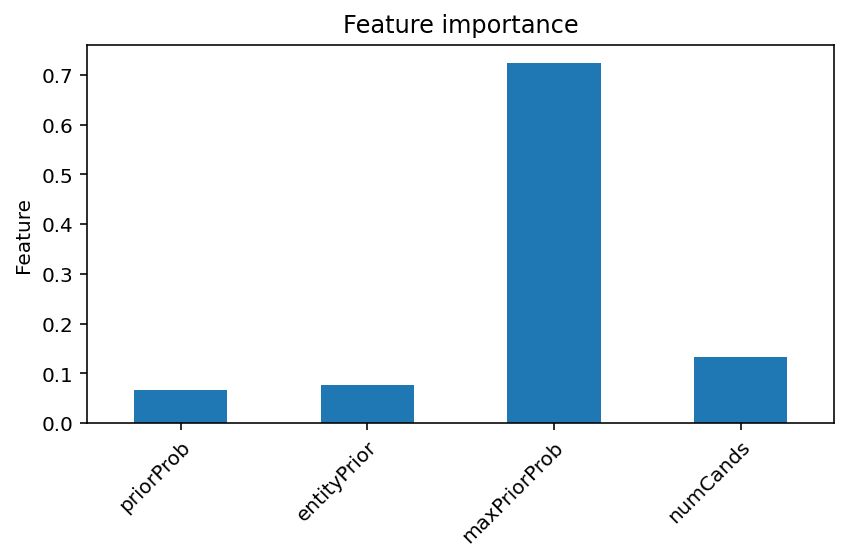

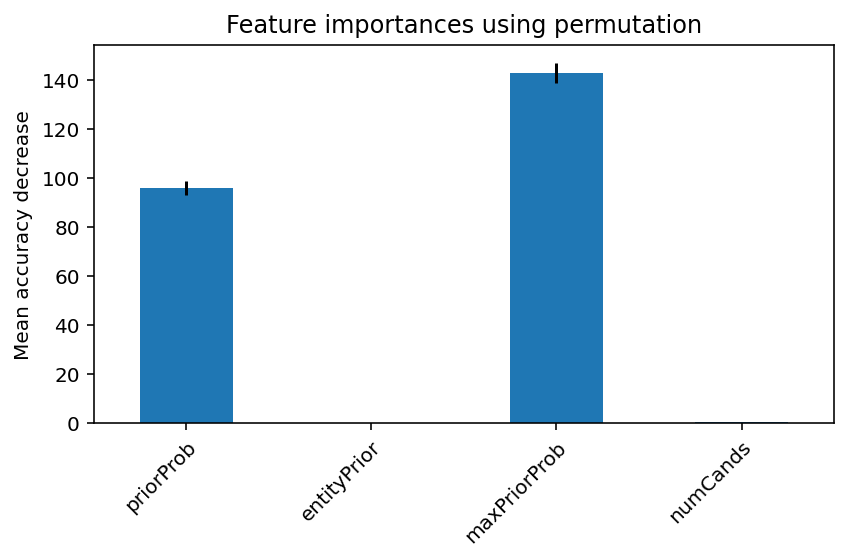

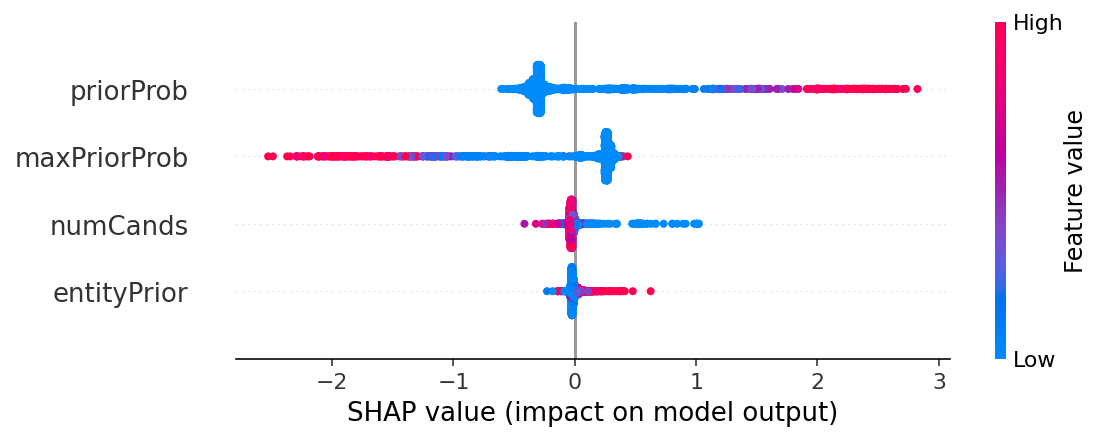

In [4]:
df_test = pd.read_csv(f"./data/GBRT/wiki2vec_w10_100d.pkl_test.csv")
for i in ['coherence.pkl', 'context.pkl', 'string_sim.pkl', 'base.pkl']:
    print(i)
    model = load_model(os.path.join(DATADIR, i))
    plot_feat_importance(model, df_test)

wiki2vec_w10_300d.pkl


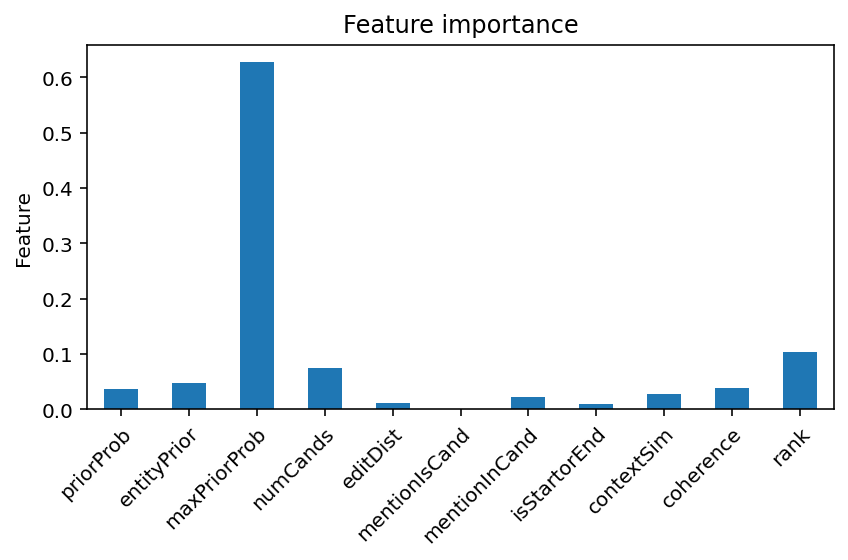

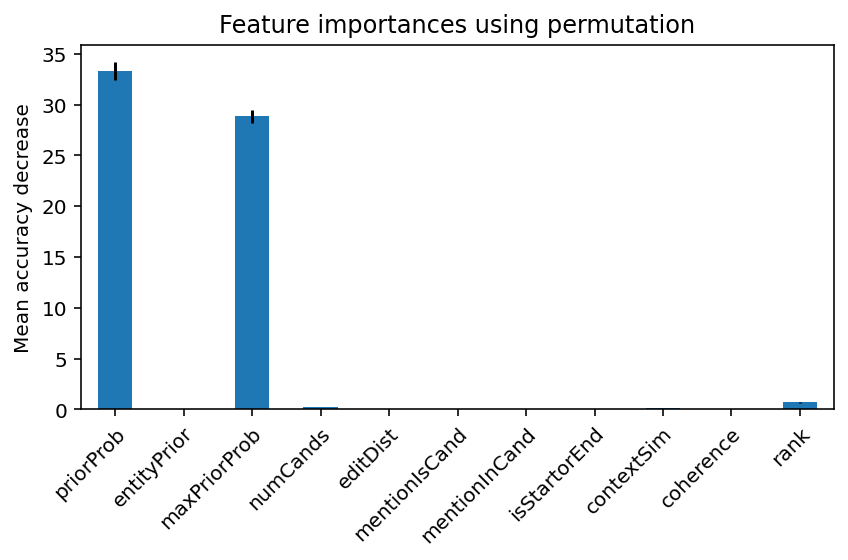

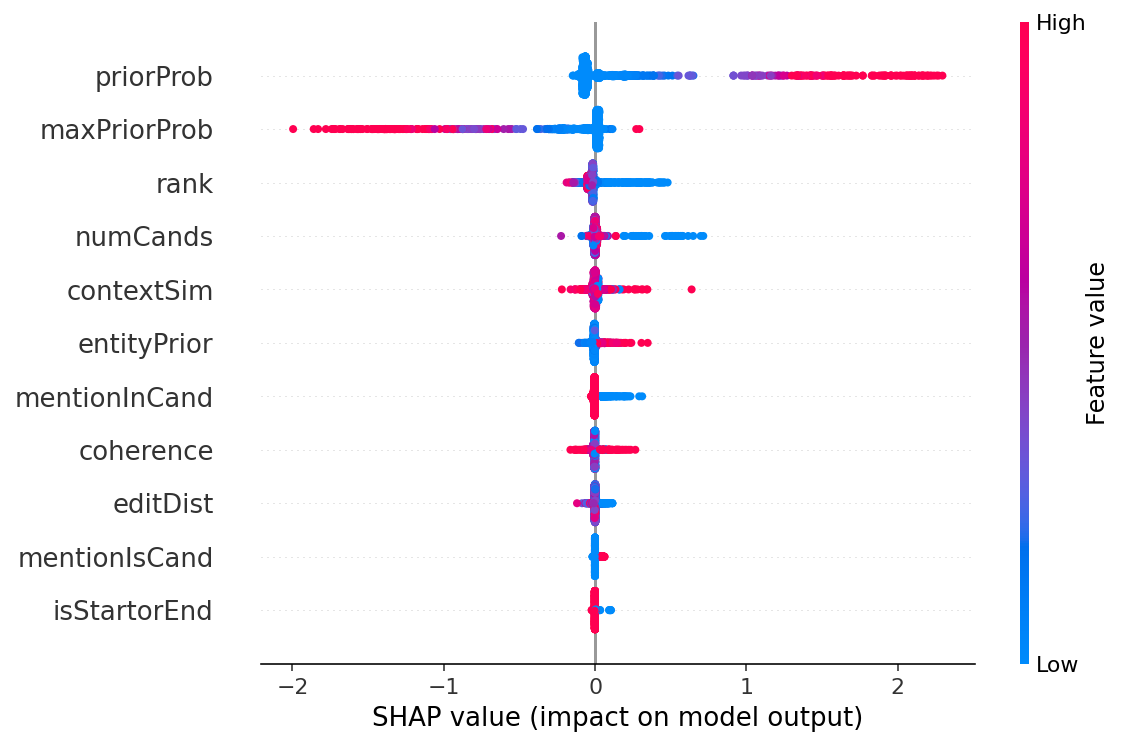

word2vec-google-news-300


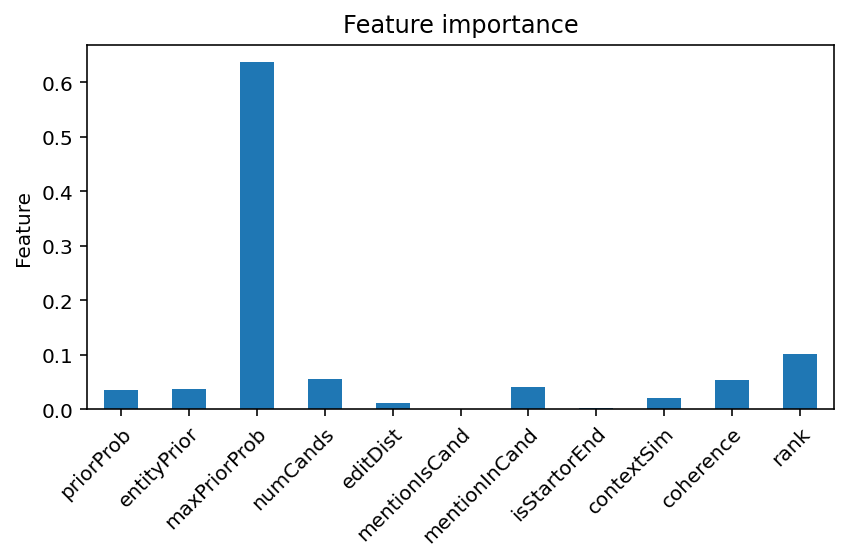

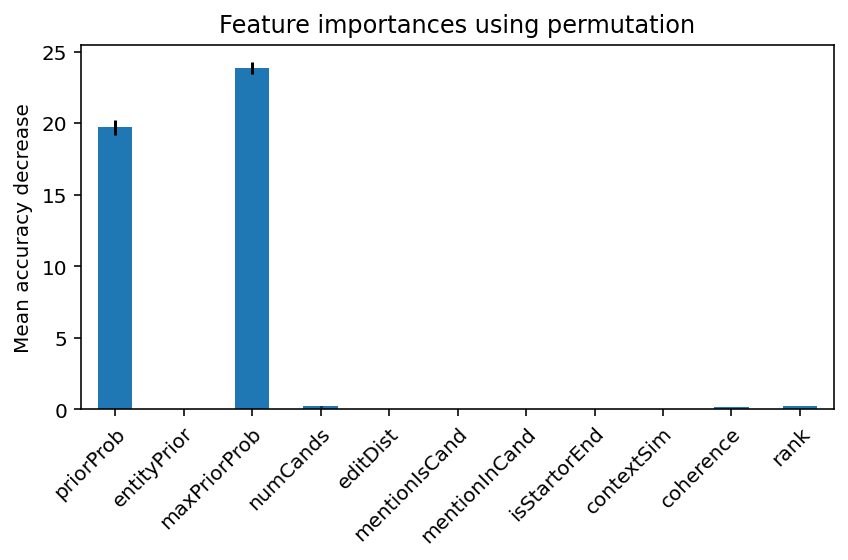

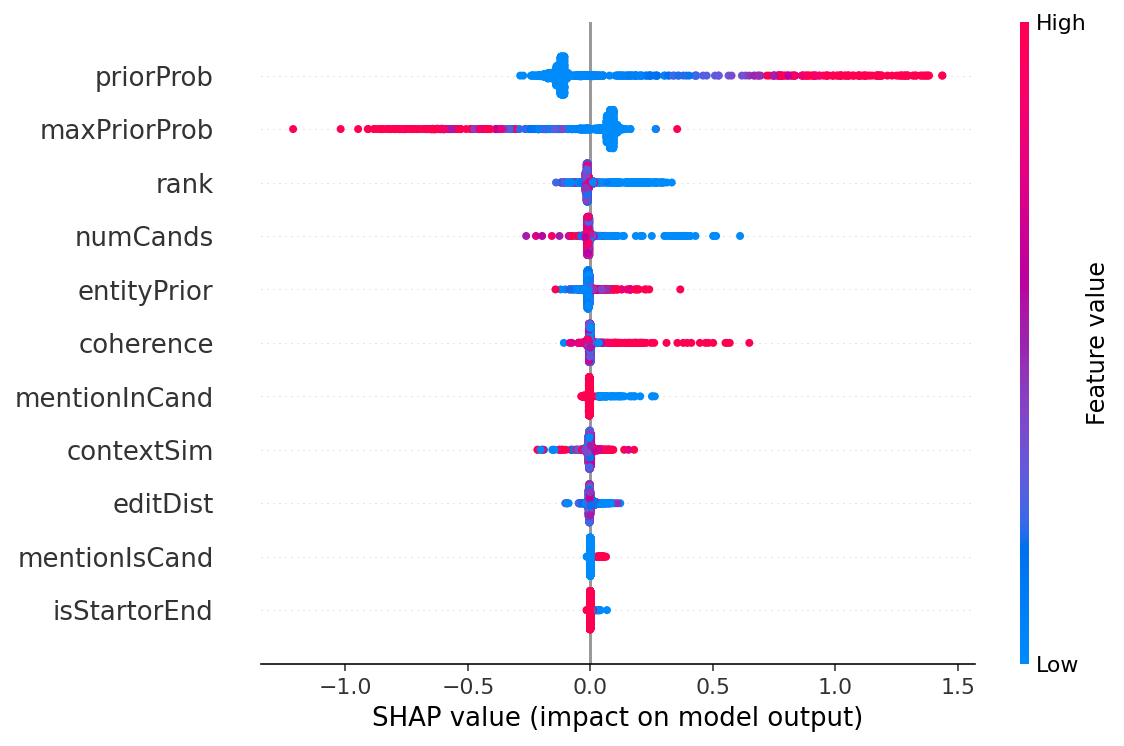

glove-wiki-gigaword-300


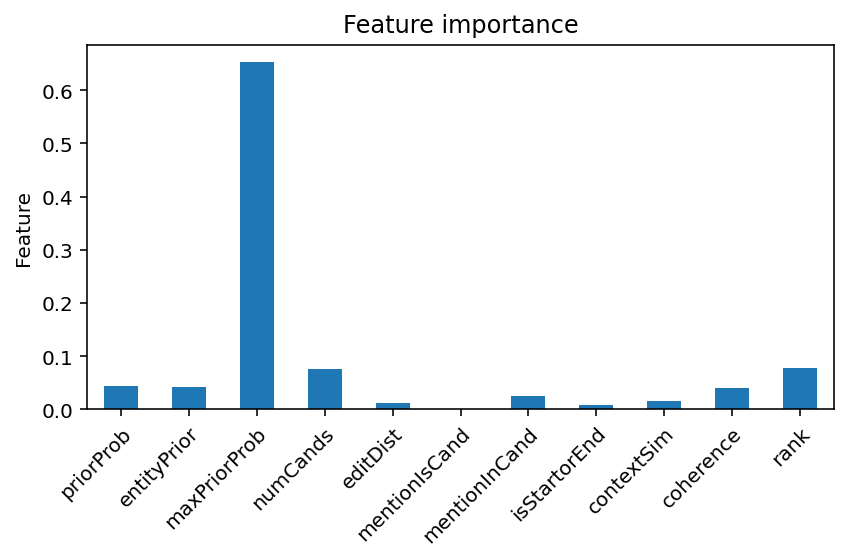

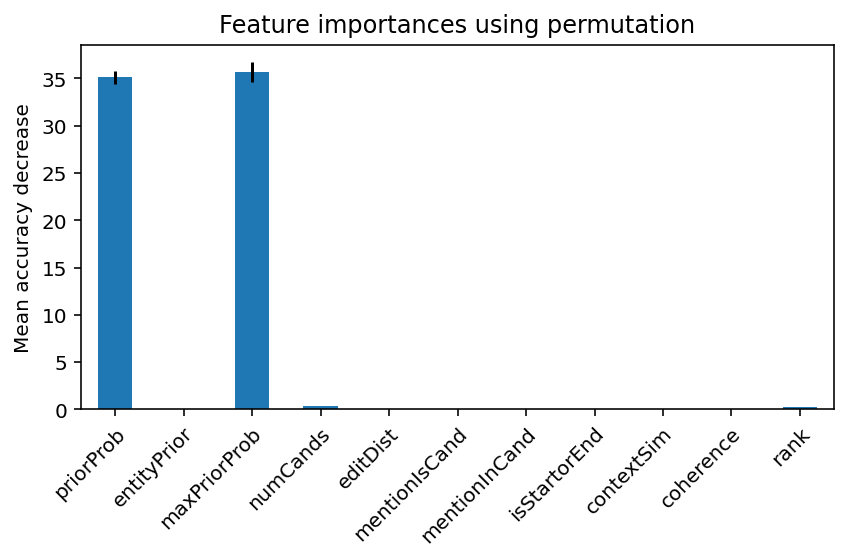

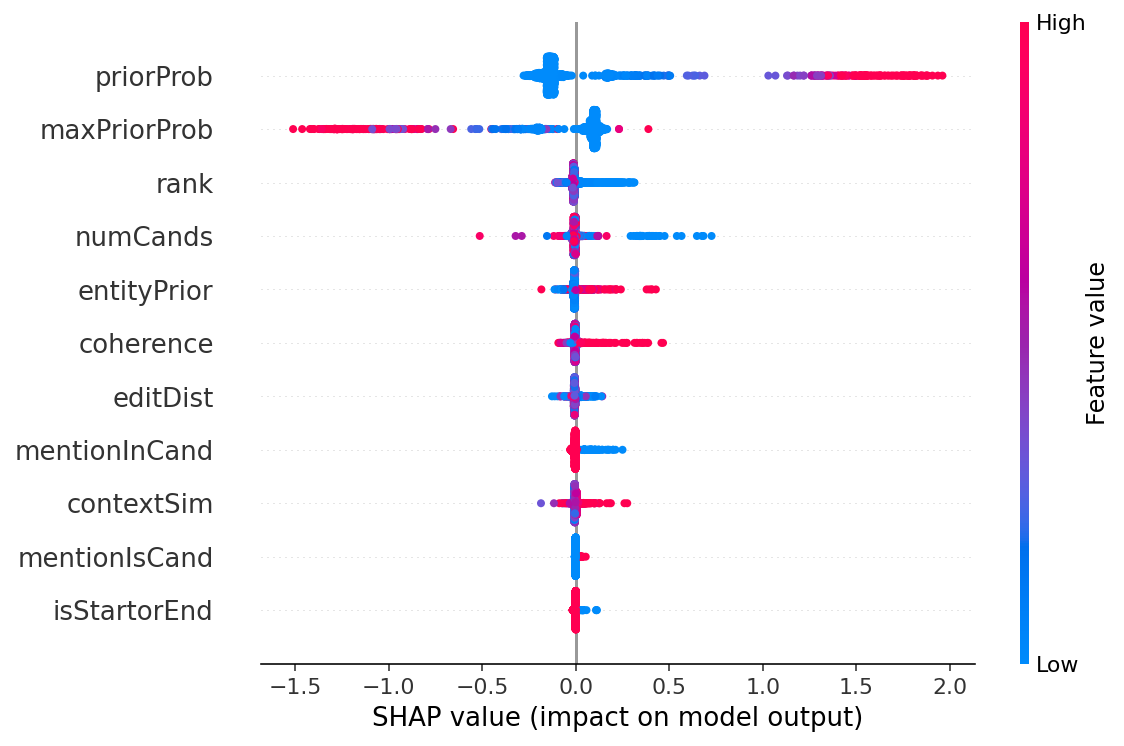

In [5]:
embs = ['wiki2vec_w10_300d.pkl', 'word2vec-google-news-300', 'glove-wiki-gigaword-300']
for emb in embs:
    print(emb)
    df_test = pd.read_csv(f"./data/GBRT/{emb}_test.csv")
    model   = load_model(os.path.join(DATADIR, emb + '_trained.pkl'))
    plot_feat_importance(model, df_test)